In [ ]:
pip install ftfy

     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=72d3a940d52754a1411fcf075e50df81946a3ec5939ee14cbaf5e7c0b144d09a
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install textblob    

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 26.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=91fd1752e7ef5ee3470acce3c3a40fc60168e3b5fc0a0cfc9e54c803533a26f8
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
pip install deep-translator

     |████████████████████████████████| 97 kB 5.4 MB/s 
     |████████████████████████████████| 97 kB 5.5 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [ ]:
pip install contractions

     |████████████████████████████████| 321 kB 42.6 MB/s 
     |████████████████████████████████| 284 kB 24.2 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85454 sha256=5e84a1b0e1e19d4f861684cac0084335866566feb91793ab97efb6603163ea28
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
 pip install pyspellchecker 

     |████████████████████████████████| 2.7 MB 27.8 MB/s 


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from spellchecker import SpellChecker

In [ ]:
import re

In [ ]:
import ftfy

In [ ]:
import contractions

In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
from textblob import TextBlob
from langdetect import detect
from langdetect import detect_langs

In [ ]:
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
seed = 32

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
ata_path = "/content/drive/MyDrive/GreatLearning/Projects/NLP/input_data.xlsx"
print(ata_path)

/content/drive/MyDrive/GreatLearning/Projects/NLP/input_data.xlsx


In [ ]:
def remove_lead_trail_space(text):
  return text.strip()

In [ ]:
def convert_to_lowercase(text):
  return text.lower()

In [ ]:
def remove_punctuation(text):
    PUNCT_TO_REMOVE = string.punctuation
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
def remove_digits(text):
  digits_rem = ''.join((x for x in text if not x.isdigit()))
  return digits_rem

In [ ]:
def remove_stopwords(text):
    STOPWORDS = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
def lemmetize_text(text):
  lemmatizer = WordNetLemmatizer()
  word_list = nltk.word_tokenize(text)
  lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in word_list])
  return lemmatized_output

In [ ]:
def clean_mojibake(text):
  cleaned_mojibake = ftfy.fix_text(text)
  return cleaned_mojibake

In [ ]:
def translate_to_english(text):
  translated_text = text
  try:
    if (detect(text) != 'en'):
      translated_text = GoogleTranslator(source='auto', target='english').translate(text)
  except:
    translated_text = text
  return translated_text

In [ ]:
def remove_linebreaks(text):
  text = text.replace("\r"," ")
  text = text.replace("\n"," ")
  text = text.replace("\t"," ")
  return text

In [ ]:
def extract_received_from_mail(text):
  return_text = ""
  match = re.search(r'received from: [\w\.-]+@[\w\.-]+', text)
  if bool(match):
    mail_match = re.search(r'[\w\.-]+@[\w\.-]+', match.group(0))
    return_text = mail_match.group(0)
  else:
    return_text = "No Match"
  return return_text

In [ ]:
def extract_subject_from_mail(text):
  return_subject = ""
  match_subject = re.search(r'subject:.*[\r\n\t\f\v]', text)
  if bool(match_subject):
    return_subject = match_subject.group(0).replace('subject:',"")
    return_subject = remove_linebreaks(return_subject)
    return_subject = remove_lead_trail_space(return_subject)
  else:
    return_subject = "No Match"
  return return_subject

In [ ]:
def remove_received_from_mail(text):
  match = re.search(r'received from: [\w\.-]+@[\w\.-]+', text)
  if bool(match):
    text = text.replace(match.group(0),"")
  return text

In [ ]:
def remove_email(text):
  matched_emails = re.findall('\S+@\S+', text)

  for email in matched_emails:
    text = text.replace(email,"")
  return text

In [ ]:
def removed_from_to_sent_date(text):
  ## Removes the occurances of 
  ## from: till any of the line breaks
  ## to: till any of the line breaks
  ## sent: till any of the line breaks
  ## date: till any of the line breaks
  ## cc: till any of the line breaks
  ## subject: till any of the line breaks
  ## importance: till any of the line breaks

  match_job_time = re.findall(r'at:.[0-9]+/[0-9]+/[0-9]+.[0-9]+:[0-9]+:[0-9]+', text)
  match_mailto = re.findall(r'<mailto:.*>', text)
  match_from = re.findall(r'from:.*[\r\n]', text)
  match_to = re.findall(r'to:.*[\r\n]', text)
  match_sent = re.findall(r'sent:.*[\r\n]', text) 
  match_date = re.findall(r'date:.*[\r\n]', text)
  match_cc = re.findall(r'cc:.*[\r\n]', text)
  match_subject = re.findall(r'subject:.*[\r\n]', text)
  match_importance = re.findall(r'importance:.*[\r\n]', text)
  match_first_name = re.findall(r'first name.*[\r\n]', text)
  match_last_name = re.findall(r'last name.*[\r\n]', text)
  match_user_name_space = re.findall(r'user name:.*[\r\n]', text)
  match_user_name = re.findall(r'username:.*[\r\n]', text)
  match_name = re.findall(r'name:.*[\r\n]', text)
  match_language = re.findall(r'language:.*[\r\n]', text)
  match_browser = re.findall(r'browser:.*[\r\n]', text)
  match_mail_id = re.findall(r'mail id:.*[\r\n]', text)
  match_email_address = re.findall(r'email address:.*[\r\n]', text)
  match_email = re.findall(r'email:.*[\r\n]', text)
  match_customernumber = re.findall(r'customer number:.*[\r\n]', text)
  match_customerjobtitle = re.findall(r'customer job title:.*[\r\n]', text)
  match_telephone = re.findall(r'telephone:.*[\r\n]', text)
  match_contact = re.findall(r'contact #:.*[\r\n]', text)
  match_vit_ref_num = re.findall(r'vitalyst reference number:.*[\r\n]', text)
  match_supervisor = re.findall(r'supervisor:.*[\r\n]', text)
  match_manager = re.findall(r'manager.*[\r\n]', text)
  match_i_number = re.findall(r'i number:.*[\r\n]', text)
  match_cost_center = re.findall(r'cost center.*[\r\n]', text)
  match_ext_comp = re.findall(r'external company name.*[\r\n]', text)
  match_emp_id = re.findall(r'emp id:.*[\r\n]', text)
  match_emb_image = re.findall(r'\[cid:image.*\]', text)
  match_begin_fwd_msg = re.findall(r'begin forwarded message:', text)
  match_sent_from_iphone = re.findall(r'(sent from my iphone|sent from my ipad)', text)
  match_sir_madam = re.findall(r'(sir or madam,|sir/mam,|sir,)', text)
  match_yes_no_na_option = re.findall(r'(\(yes/no/na\))', text)
  match_summary = re.findall(r'summary:', text)

  all_matches = match_job_time + match_mailto + match_from + match_to + match_sent + match_date + match_cc + match_subject + match_importance + match_first_name + match_last_name + match_user_name_space + match_user_name + match_name + match_language + match_browser + match_mail_id + match_email_address + match_email + match_customernumber + match_telephone + match_summary + match_customerjobtitle + match_contact + match_vit_ref_num + match_supervisor + match_manager + match_i_number + match_cost_center + match_ext_comp + match_emp_id + match_emb_image + match_begin_fwd_msg + match_sent_from_iphone + match_sir_madam + match_yes_no_na_option

  for matched_text in all_matches:
    text = text.replace(matched_text, "")

  return text

In [ ]:
def remove_greetings(text):
  match_greetings = re.search(r'(^|\s)(good day|good afternoon|good morning|good evening)(,|\s|!|.|:)', text)
  if bool(match_greetings):
    text = text.replace(match_greetings.group(0),"")
  return text

In [ ]:
def remove_best_wishes(text):
  match_bestwishes = re.search(r'(with best|best|with kind|kind|many|with warm|warm)$', text)
  if bool(match_bestwishes):
    text = text.replace(match_bestwishes.group(0),"")
  return text

In [ ]:
def remove_hello_wishes(text):
  match_hellowishes = re.search(r'(hello i.t. team|hello help-team|hello support team|hello help-team|hello it-team|hello ladies and gentlemen|hello  it helper|hellow|hello it support|hello all|hello colleagues|hi there|hello it team|hello sir|hello it service|hello it|hello helpdesk|hello team|hello all|hello it desk|hello  it helper|hello dac|hello|gentles|it team|dear all|dear it|dear|hallo|all groups|it help|team)(,|\s|!|.|:|;|<|~)', text)
  if bool(match_hellowishes):
    text = text.replace(match_hellowishes.group(0),"")
  return text

In [ ]:
def remove_hi(text):
  match_hi = re.search(r'(hi it|hi team|hi it experts|hi)(,|\s|!|.|:)', text)
  if bool(match_hi):
    text = text.replace(match_hi.group(0),"")
  return text          

In [ ]:
def remove_thanking(text):
  match_thanking = re.search(r'(thanking you|thanking u|thank u|thank you|thanks)(,|.|/s|$)', text)
  if bool(match_thanking):
    text = text.replace(match_thanking.group(0),"")
  return text

In [ ]:
def expand_pls(text):
  match_pls = re.search(r'(pls)(\s|.)', text)
  if bool(match_pls):
    text = text.replace(match_pls.group(0),"")
  return text

In [ ]:
def remove_please(text):
  match_help = re.search(r'please help to', text)
  if bool(match_help):
    text = text.replace(match_help.group(0),"")
  return text

In [ ]:
def fix_contractions(text):
  fixed_contractions = contractions.fix(text)
  return fixed_contractions

In [ ]:
def preprocess_text_part1(text):
  text = clean_mojibake(text)
  text = convert_to_lowercase(text)
  return text

In [ ]:
def preprocess_text_part2(text):
  text = remove_received_from_mail(text)
  text = remove_email(text)
  text = removed_from_to_sent_date(text)
  text = remove_linebreaks(text)
  text = remove_lead_trail_space(text)
  text = translate_to_english(text)
  #text = remove_punctuation(text) 
  text = remove_digits(text)
  text = remove_greetings(text)
  text = remove_best_wishes(text)
  text = remove_hello_wishes(text)
 
  #text = remove_stopwords(text)
  #text = lemmetize_text(text)
  text = remove_hello_wishes(text)
  text = remove_lead_trail_space(text)
  text = remove_hi(text)
  text = remove_thanking(text)
  text = expand_pls(text)
  text = remove_please(text)
  text = fix_contractions(text)
  text = remove_lead_trail_space(text)
  return text

In [ ]:

ata_data = pd.read_excel(ata_path) 

In [ ]:
ata_data[['Short description','Assignment group']].head().to_json()

'{"Short description":{"0":"login issue","1":"outlook","2":"cant log in to vpn","3":"unable to access hr_tool page","4":"skype error "},"Assignment group":{"0":"GRP_0","1":"GRP_0","2":"GRP_0","3":"GRP_0","4":"GRP_0"}}'

In [ ]:
ata_data.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,"\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n",avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen.,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. bereich cnc.,kqvbrspl jyzoklfx,GRP_49


In [ ]:
ata_data.shape

(8500, 4)

In [ ]:
ata_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
ata_data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
# Finding duplicate records
ata_data[ata_data.duplicated()]['Short description'].value_counts()

blank call                                                                                        10
call for ecwtrjnq jpecxuty                                                                         6
reset passwords for bxeagsmt zrwdgsco using password_management_tool password reset.               5
job Job_3028 failed in job_scheduler at: 08/24/2016 00:02:00                                       4
call came and got disconnected                                                                     3
blank call //gso                                                                                   3
blank call                                                                                         2
job Job_1314 failed in job_scheduler at: 08/25/2016 08:15:00                                       2
blank call // loud noise                                                                           2
svc-now ticket found... doing nothing                                                      

In [ ]:
# Removing duplicate records
ata_data=ata_data.drop_duplicates()

In [ ]:
ata_data.duplicated().value_counts()

False    8417
dtype: int64

There are some null values in Short Description & Description column and putting them in a different column for analysis purpose

In [ ]:
ata_data[ata_data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0


In [ ]:
ata_data[ata_data['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
sd_null = ata_data[ata_data['Short description'].isnull()]
sd_null

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0


Places where Short Description is null - replacing it with Description and vice versa.

In [ ]:
ata_data['short_desc_analysis'] = np.where(ata_data['Short description'].isnull(), ata_data['Description'], ata_data['Short description'])
ata_data['desc_analysis'] = np.where(ata_data['Description'].isnull(), ata_data['Short description'], ata_data['Description'])

In [ ]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


In [ ]:
ata_data.isnull().sum()

Short description      8
Description            1
Caller                 0
Assignment group       0
short_desc_analysis    0
desc_analysis          0
dtype: int64

In [ ]:
ata_data[ata_data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest","\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest"
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!
4341,NaN,"\r\n\r\nreceived f

There are some messages which mentions that they are received from someone else.  Looking into the data to see such entries

In [ ]:
ata_data[ata_data['Description'].str.contains('received from:', case=False, na=False)]

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest
16,unable to login to company vpn,"\n\nreceived from: xyz@company.com\n\nhi,\n\ni am unable to login to company vpn website, trying to open a new session using the below link, but not able to get through pls help urgently as we are working from home tomorrow due to month end closing.",chobktqj qdamxfuc,GRP_0,unable to login to company vpn,"\n\nreceived from: xyz@company.com\n\nhi,\n\ni am unable to login to company vpn website, trying to open a new session using the below link, but not able to get through pls help urgently as we are working from home tomorrow due to month end closing."
21,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest",ugephfta hrbqkvij,GRP_0,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest"
24,vpn not working,"\n\nreceived from: dceoufyz.saufqkmd@gmail.com\n\nhello,\n\ni'm not being able to connect to company network through the vpn. pls check.\n\ncc: sir-i am not being able to upload as a result of no company network.\n\n",dceoufyz saufqkmd,GRP_0,vpn not working,"\n\nreceived from: dceoufyz.saufqkmd@gmail.com\n\nhello,\n\ni'm not being able to connect to company network through the vpn. pls check.\n\ncc: sir-i am not being able to upload as a result of no company network.\n\n"
...,...,...,...,...,...,...
8478,beenefits access on oneteam,"\n\nreceived from: bjitvswa.yrmugfnq@gmail.com\n\nyesterday, it helped me access some additional information on oneteam. but i still do not have a link showing for my benefits. i tried to search and nothing pulls up.\n\ntgbtyim dgtalone\nkey account manager\nbjitvswa.yrmugfnq@gmail.com<mailto:beyklcmj.bgfmrltw@gmail.com>\n",bjitvswa yrmugfnq,GRP_0,beenefits access on oneteam,"\n\nreceived from: bjitvswa.yrmugfnq@gmail.com\n\nyesterday, it helped me access some additional information on oneteam. but i still do not have a link showing for my benefits. i tried to search and nothing pulls up.\n\ntgbtyim dgtalone\nkey account manager\nbjitvswa.yrmugfnq@gmail.com<mailto:beyklcmj.bgfmrltw@gmail.com>\n"
8480,customer group enhanced field,"\r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail.com\r\n\r\nhello,\r\n\r\na business decision has recently been made to view mfg_tooltion (customer classification ik) as indirect sales going forward. currently in the be

There are *2227* such records.  Getting that information in another column

In [ ]:
ata_data[ata_data['Description'].str.contains('to:', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
53,reset scm_software password,"\n\nreceived from: cdbaoqts.wqbsodni@gmail.com\n\nhello,\n\nplease reset my scm_software password.\n\n\ncdbaoqts wqbsodni\nglobal product manager, markhtyeting initiatives\ncdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>\n\n\n\n\n\n",cdbaoqts wqbsodni,GRP_0,reset scm_software password,"\n\nreceived from: cdbaoqts.wqbsodni@gmail.com\n\nhello,\n\nplease reset my scm_software password.\n\n\ncdbaoqts wqbsodni\nglobal product manager, markhtyeting initiatives\ncdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>\n\n\n\n\n\n"
100,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n",noscwdpm akiowsmp,GRP_0,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n"
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n"
151,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n,bwfhtumx japznrvb,GRP_16,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n
162,access to bex,"\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail.com\r\n\r\nhello,\r\n\r\ntill last week i was accessing bex reports using mms portal and there were no issues.\r\n\r\nstarting this week the system is incredibly slow when i log in and finally does not allow me to access any reports.\r\n\r\ncan it be the issue with any maintenance or my access rights or rather i should try to access bex using different way?\r\n\r\nbelow the print screen from what i see after log in:\r\n[cid:image001.png@01d2310c.f184b360]\r\n\r\ni am also able to get to finance reports (see below), however when i click ""profitability analysis"" (as i was always doing) separate window is open however apart rom that the screen is blank.\r\n[cid:image002.png@01d2310c.f184b360]\

There are some Description which are copy paste of mails.  We can see texts such as

1. from:
2. to:
3. sent:
4. date:
5. cc:
6. subject: 

We will remove such text from our analysis.  We will copy the subject to another column to see if it can be of use in future

In [ ]:
ata_data[ata_data['Description'].str.contains('name:', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
135,access to business_client drawings,name:xvgftyr tryfuh\nlanguage:\nbrowser:microsoft internet explorer\nemail:cnkoflhi.abeoucfj@gmail.com\ncustomer number:\nsummary:i cannot seem to access the drawings from the netweaver application that is installed on my computer. it doesn't take me to the same page that my colleagues have.,rbozivdq gmlhrtvp,GRP_0,access to business_client drawings,name:xvgftyr tryfuh\nlanguage:\nbrowser:microsoft internet explorer\nemail:cnkoflhi.abeoucfj@gmail.com\ncustomer number:\nsummary:i cannot seem to access the drawings from the netweaver application that is installed on my computer. it doesn't take me to the same page that my colleagues have.
136,taking off email permissions from personal phone,name:vdhfy\nlanguage:\nbrowser:microsoft internet explorer\nemail:dcvphjru.ybomrjst@gmail.com\ncustomer number:\nsummary:i have scrapped the old phone. my mail was configured in it. can you take off the permissions set to view mails on that phone,dcvphjru ybomrjst,GRP_0,taking off email permissions from personal phone,name:vdhfy\nlanguage:\nbrowser:microsoft internet explorer\nemail:dcvphjru.ybomrjst@gmail.com\ncustomer number:\nsummary:i have scrapped the old phone. my mail was configured in it. can you take off the permissions set to view mails on that phone
147,good morning. i am having trouble getting into my vpn,name:wvngzrca sfmrzdth\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvngzrca.sfmrzdth@gmail.com\ncustomer number:\nsummary:good morning. i am having trouble getting into my vpn\ncan you assist,wvngzrca sfmrzdth,GRP_0,good morning. i am having trouble getting into my vpn,name:wvngzrca sfmrzdth\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvngzrca.sfmrzdth@gmail.com\ncustomer number:\nsummary:good morning. i am having trouble getting into my vpn\ncan you assist
200,unable to open website,\nname:xbdht yrjhd\nlanguage:\nbrowser:microsoft internet explorer\nemail:aqjdvexo.lmedazjo@gmail.com\ncustomer number:\nsummary: benefit advisor will not run in my browser.,aqjdvexo lmedazjo,GRP_0,unable to open website,\nname:xbdht yrjhd\nlanguage:\nbrowser:microsoft internet explorer\nemail:aqjdvexo.lmedazjo@gmail.com\ncustomer number:\nsummary: benefit advisor will not run in my browser.
226,enable bgdxitwu dhcopwxa' active directory account,enable bgdxitwu dhcopwxa' active directory account\n\nname:fdgrty\nemail:kybgepnj.idszleru@gmail.com\nsummary:i need bgdxitwu dhcopwxa's active directory account enabled.,kcwqdeob jwtpkzub,GRP_2,enable bgdxitwu dhcopwxa' active directory account,enable bgdxitwu dhcopwxa' active directory account\n\nname:fdgrty\nemail:kybgepnj.idszleru@gmail.com\nsummary:i need bgdxitwu dhcopwxa's active directory account enabled.


There seems to be a template where below details are captured
1. name
2. language
3. browser
4. email
5. customercare number
6. summary 

Keeping only the text provided as summary for further analysis 

In [ ]:
ata_data[ata_data['Description'].str.contains('cid:image', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
21,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest",ugephfta hrbqkvij,GRP_0,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest"
62,issues with outlook,\r\n\r\nreceived from: lkfzibrx.ljnabpgx@gmail.com\r\n\r\n[cid:image001.png@01d23357.fcbe58b0]\r\n\r\nbest,lkfzibrx ljnabpgx,GRP_0,issues with outlook,\r\n\r\nreceived from: lkfzibrx.ljnabpgx@gmail.com\r\n\r\n[cid:image001.png@01d23357.fcbe58b0]\r\n\r\nbest
107,attendance_tool - system log on error,"\n\nreceived from: isfadulo.etkyjabn@gmail.com\n\nhello\n\ngood morning,\n\ni am experiencing issues with attendance_tool log on\nevery time i try to log on through ""single sign portal, the following screen gets displayed and it stays there.\nappreciate your support to fix this issue\n\n\n[cid:image011.jpg@01d231cb.2cceacf0]\n\n",isfadulo etkyjabn,GRP_0,attendance_tool - system log on error,"\n\nreceived from: isfadulo.etkyjabn@gmail.com\n\nhello\n\ngood morning,\n\ni am experiencing issues with attendance_tool log on\nevery time i try to log on through ""single sign portal, the following screen gets displayed and it stays there.\nappreciate your support to fix this issue\n\n\n[cid:image011.jpg@01d231cb.2cceacf0]\n\n"
128,password change thru password_management_tool password manager,"\r\n\r\nreceived from: jvpkulxw.ovuweygj@gmail.com\r\n\r\nhello sir,\r\n\r\ni tried to change my password thru above. i got below error. pl help know what action to be taken further to ensure all passwords are same everywhere since belo wmsg says all passwords were not changed.\r\n\r\n[cid:image001.jpg@01d2316b.5ff15980]\r\n\r\n",jvpkulxw ovuweygj,GRP_0,password change thru password_management_tool password manager,"\r\n\r\nreceived from: jvpkulxw.ovuweygj@gmail.com\r\n\r\nhello sir,\r\n\r\ni tried to change my password thru above. i got below error. pl help know what action to be taken further to ensure all passwords are same everywhere since belo wmsg says all passwords were not changed.\r\n\r\n[cid:image001.jpg@01d2316b.5ff15980]\r\n\r\n"
151,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n,bwfhtumx japznrvb,GRP_16,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n


There are some texts containing embedded image details.  Removing the text pertaining to embedded images

In [ ]:
ata_data['short_desc_analysis'] = ata_data['short_desc_analysis'].apply(preprocess_text_part1)
ata_data['desc_analysis'] = ata_data['desc_analysis'].apply(preprocess_text_part1)

In [ ]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the password.\n-advised the user to login and check.\n-caller confirmed that he was able to login.\n-issue resolved.
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com\n\nhi\n\ni cannot log on to vpn\n\nbest
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


In [ ]:
ata_data['mail_received_from'] = ata_data['desc_analysis'].apply(extract_received_from_mail)
ata_data['mail_subject_mentioned'] = ata_data['desc_analysis'].apply(extract_subject_from_mail)

In [ ]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the password.\n-advised the user to login and check.\n-caller confirmed that he was able to login.\n-issue resolved.,No Match,No Match
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind",hmjdrvpb.komuaywn@gmail.com,No Match
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com\n\nhi\n\ni cannot log on to vpn\n\nbest,eylqgodm.ybqkwiam@gmail.com,No Match
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,No Match,No Match
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match


In [ ]:
ata_data['short_desc_analysis'] = ata_data['short_desc_analysis'].apply(preprocess_text_part2)
ata_data['desc_analysis'] = ata_data['desc_analysis'].apply(preprocess_text_part2)

Removing the Caller name from the description.  

In [ ]:
caller_list = ata_data["Caller"].str.split(" ", n = 1, expand = True)
caller_list

,0,1
0,spxjnwir,pjlcoqds
1,hmjdrvpb,komuaywn
2,eylqgodm,ybqkwiam
3,xbkucsvz,gcpydteq
4,owlgqjme,qhcozdfx
...,...,...
8495,avglmrts,vhqmtiua
8496,rbozivdq,gmlhrtvp
8497,oybwdsgx,oxyhwrfz
8498,ufawcgob,aowhxjky


In [ ]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct t?",hmjdrvpb.komuaywn@gmail.com,No Match
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cannot log in to vpn,i cannot log on to vpn,eylqgodm.ybqkwiam@gmail.com,No Match
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,No Match,No Match
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match


In [ ]:
ata_data.tail()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
8495,emails not coming in from zz mail,"\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n",avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail,i am not receiving the emails that i sent from zz mail. please advise,avglmrts.vhqmtiua@gmail.com,No Match
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,telephony_software issue,No Match,No Match
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,vip: windows password reset for tifpdchb pedxruyf,vip: windows password reset for tifpdchb pedxruyf,No Match,No Match
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,ufawcgob aowhxjky,GRP_62,mace is not working,i am unable to access the mace utilities to finish the drawers adjustment settings. is no network..,No Match,No Match
8499,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen.,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. bereich cnc.,kqvbrspl jyzoklfx,GRP_49,Different programs cannot be opened on several pc's.,Different programs cannot be opened on several pc's. area cnc.,No Match,No Match


In [ ]:
ata_data[ata_data['mail_received_from']!='No Match']['mail_received_from'].value_counts()

monitoring_tool@company.com    939
rxoynvgi.ntgdsehl@gmail.com     14
gjtyswkb.dpvaymxr@gmail.com     11
vkzwafuh.tcjnuswg@gmail.com     10
zuxcfonv.nyhpkrbe@gmail.com      9
                              ... 
tgafnyzb.hnevrcuj@gmail.com      1
bgqpotek.cuxakvml@gmail.com      1
agjzikpf.nhfrbxek@gmail.com      1
ntsowaem.jfgslyde@gmail.com      1
efjzbtcm.mdpviqbf@gmail.com      1
Name: mail_received_from, Length: 711, dtype: int64

In [ ]:
ata_data[ata_data['mail_subject_mentioned']!='No Match']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
100,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n",noscwdpm akiowsmp,GRP_0,re: ess portal access issue,he is an kiosk user. please reset the password and confirm. noscwdpm akiowsmp below mentioned employee krlszbqo spimolgz with user id sv is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.,noscwdpm.akiowsmp@gmail.com,ess portal access issue
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation,i received this message and our local it expert has told me to open a ticket.,No Match,se ha bloqueado en forma temporal la sincronización de su dispositivo móvil mediante exchange activesync hasta que su administrador autorice el acceso.
180,crm license for user dfgry,"from: xdvwitpm zscxqdhoalaramdntyan \nsent: friday, october 28, 2016 9:40 am\nto: 'help@company.com'\ncc: xyculgav cuqptoah\nsubject: fw: crm license for dfgry\n\nhello,\n\ncrm is not installed in my laptop.\n\nplease support me on this.\n\n",xdvwitpm zscxqdho,GRP_19,crm license for user dfgry,crm is not installed in my laptop. please support me on t.,No Match,fw: crm license for dfgry
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è®¾ç½®,"from: \nsent: friday, october 28, 2016 7:20 am\nto: nwfodmhc exurcwkm\nsubject: re: é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è®¾ç½®\n\ndearï¼Œ\npls help to update customer 4563729890 shipment notification email address : abcdegy@gmail.com \n\n\nb.",yafxlpwi lhxvatkb,GRP_18,青岛兴合机电sment notification邮箱设置,help to update customer sment notification email address : b.,No Match,re: 青岛兴合机电shipment notification邮箱设置
218,"export shipment of grinding mahcine to khdgd1234, apac - advance information","\n\nreceived from: rdfjsawg.zpmxgdcw@gmail.com\n\nfrom: hdytrkfiu\nsent: thursday, october 27, 2016 4:46 pm\nto: <rfqhoaky.rncspbot@gmail.com>; <ikxjfnml.kaocbpfr@gmail.com>; <rdfjsawg.zpmxgdcw@gmail.com>\ncc: <tshljagr.mhyiopxr@gmail.com>; <zgmdster.bdvcealj@gmail.com>; xjzcbgnp vfkwscao <xjzcbgnp.vfkwscao@gmail.com>; <avurmegj.pxgmjynu@gmail.com>\nsubject: export shipment of grinding mahcine to khdgd1234, apac - advance information\n\nwe are pushixepyfbga wtqdyoin for dispatching an grinding machine to khdgd1234, apac tomorrow. this is just for your advance information. once everything is in place, we will seek your support in your areas to help us in clearing this consignment tomorrow 28.10.16.",rdfjsawg zpmxgdcw,GRP_0,"export sment of grinding mahcine to khdgd, apac - advance information","we are pusepyfbga wtqdyoin for dispatching an grinding machine to khdgd, apac tomorrow. this is just for your advance information. once everything is in place, we will seek your support in your areas to help us in clearing this consignment tomorrow ...",rdfjsawg.zpmxgdcw@gmail.com,"export shipment of grinding mahcine to khdgd1234, apac - advance information"
...,...,...,...,...,...,...,...,...
8467,"hi it help team, please unblock my new company

In [ ]:
ata_data.to_excel("intermediate_file.xlsx")

In [ ]:
ata_data[ata_data['Short description']=='unable to down load ethics module ']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
281,unable to down load ethics module,"from: brdhdd dhwduw\nsent: thursday, october 27, 2016 6:12 am\nto: nwfodmhc exurcwkm\nsubject::fwd: unable to down load ethics module \n\n\nbegin forwarded message:\nfrom: <dqwhpjxy.pozjxbey@gmail.com>\nto: <zanivrec.capbfhur@gmail.com>\nsubject: unable to down load ethics module \nhi â€“ trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist.\n \nplease help.\n \n \n \n \n \ndirector of sales \ncompany indirect channels - asia \n& \ndqwhpjxy.pozjxbey@gmail.com \n\n \n \n \n \n\n\n",dqwhpjxy pozjxbey,GRP_0,unable to down load ets module,– trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist. please help. director of sales company indirect channels - asia &,No Match,:fwd: unable to down load ethics module


In [ ]:
ata_data[ata_data['Short description']=='no login options in erp']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
2143,no login options in erp,after netweaver installing it is not possible to log in to erp 740. \nuser name: nagdyiyst,krdvgzeh yboasemp,GRP_0,no login options in erp,after netweaver installing it is not possible to log in to erp . user name: nagdyiyst,No Match,No Match


In [ ]:
ata_data['Assignment group'].value_counts()

GRP_0     3934
GRP_8      645
GRP_24     285
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_73       1
GRP_67       1
GRP_64       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


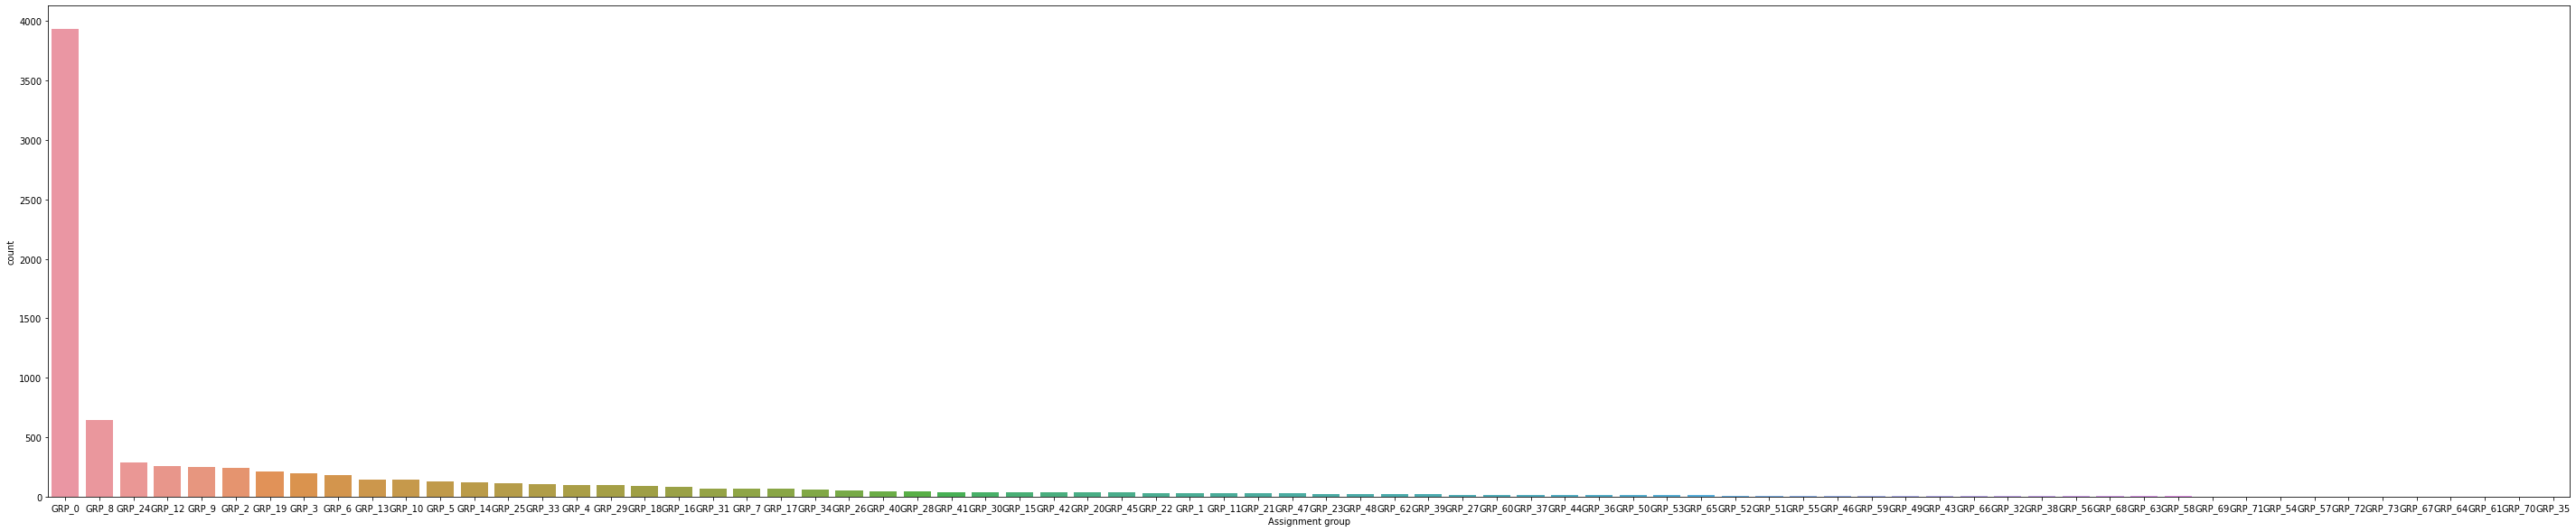

In [ ]:
assignment_group_desc_order = ata_data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(50,10))
sns.countplot(ata_data['Assignment group'], order=assignment_group_desc_order)

In [ ]:
stop_words = set(stopwords.words('english'))

ata_data['number_of_words_short_desc'] = ata_data.short_desc_analysis.apply(lambda x: len(x.split()))
ata_data['number_of_char_short_desc'] = ata_data.short_desc_analysis.str.len()
ata_data['number_of_punctuations_short_desc'] = ata_data.short_desc_analysis.apply(lambda x : len([x for x in x if x in string.punctuation]))
ata_data['number_of_stop_words_short_desc'] = ata_data.short_desc_analysis.apply(lambda x: len([x for x in str(x).split() if x in stop_words]))




ata_data['number_of_words_desc'] = ata_data.desc_analysis.apply(lambda x: len(x.split()))
ata_data['number_of_char_desc'] = ata_data.desc_analysis.str.len()
ata_data['number_of_punctuations_desc'] = ata_data.desc_analysis.apply(lambda x : len([x for x in x if x in string.punctuation]))
ata_data['number_of_stop_words_desc'] = ata_data.desc_analysis.apply(lambda x: len([x for x in str(x).split() if x in stop_words]))

In [ ]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned,number_of_words_short_desc,number_of_char_short_desc,number_of_punctuations_short_desc,number_of_stop_words_short_desc,number_of_words_desc,number_of_char_desc,number_of_punctuations_desc,number_of_stop_words_desc
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,2,11,0,0,31,188,13,11
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct t?",hmjdrvpb.komuaywn@gmail.com,No Match,1,7,0,0,19,117,3,8
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cannot log in to vpn,i cannot log on to vpn,eylqgodm.ybqkwiam@gmail.com,No Match,5,20,0,2,6,22,0,3
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,No Match,No Match,5,29,1,1,5,29,1,1
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match,2,11,0,0,2,11,0,0


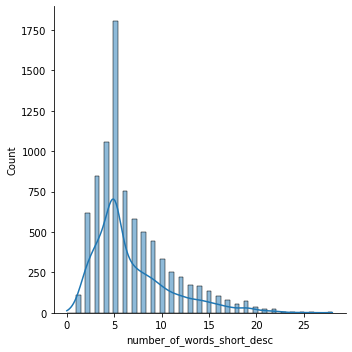

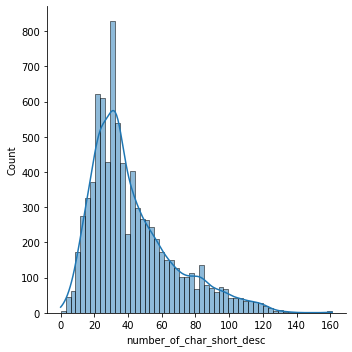

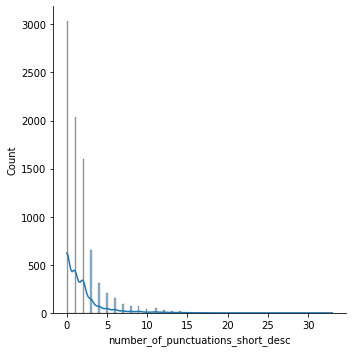

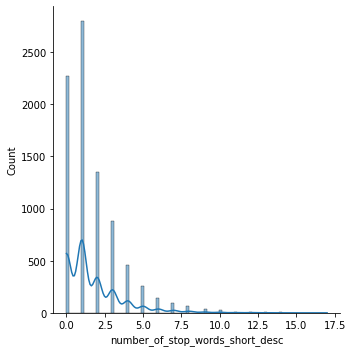

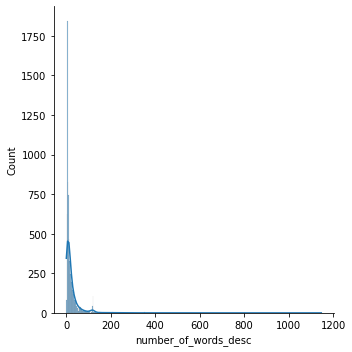

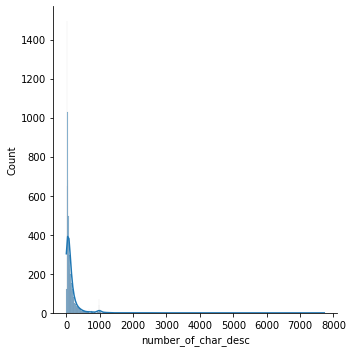

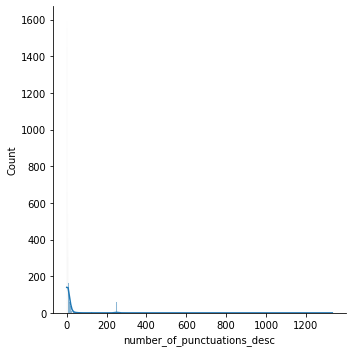

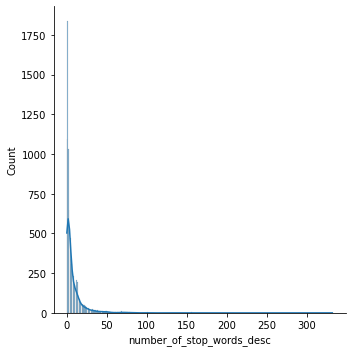

In [ ]:
for displot_col in ata_data.select_dtypes(include = 'number').columns:
    sns.displot(ata_data, x = displot_col, kde=True)

In [ ]:
ata_data['Caller'].value_counts()

bpctwhsn kzqsbmtp    788
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    128
rbozivdq gmlhrtvp     72
rkupnshb gsmzfojw     71
                    ... 
pnacqfso ojwkmzcb      1
cxltnjuk hkdefraw      1
xnmgsawf bwghcmxq      1
hymjicru ckrxqfes      1
hzmxwdrs tcbjyqps      1
Name: Caller, Length: 2950, dtype: int64

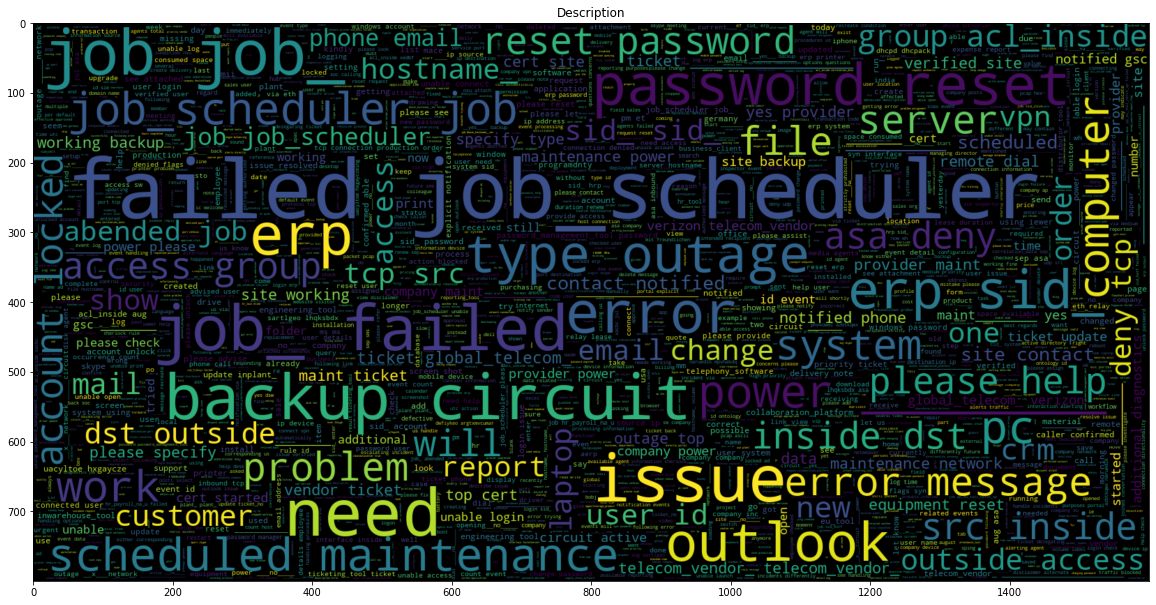

In [ ]:
plt.figure(figsize = (20,20))
word_cloud = WordCloud(max_words = 5000 , width = 1600 , height = 800).generate(" ".join(ata_data['desc_analysis']))
plt.title('Description')
plt.imshow(word_cloud , interpolation = 'bilinear')

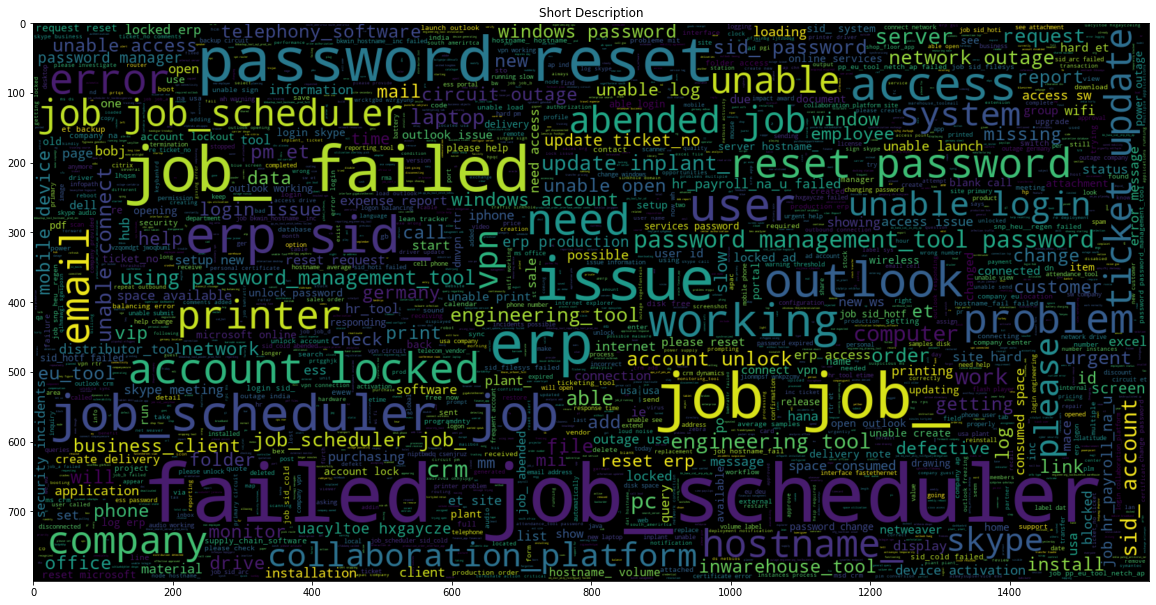

In [ ]:
plt.figure(figsize = (20,20))
word_cloud = WordCloud(max_words = 5000 , width = 1600 , height = 800).generate(" ".join(ata_data['short_desc_analysis']))
plt.title('Short Description')
plt.imshow(word_cloud , interpolation = 'bilinear')

In [ ]:
#for grp in list(ata_data['Assignment group'].unique()):
 # plt.figure(figsize = (20,20))
 # word_cloud = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(ata_data[ata_data['Assignment group']==grp]['short_desc_analysis']))
 # plt.title(grp)
  #plt.imshow(word_cloud , interpolation = 'bilinear')

In [ ]:
#for grp in list(ata_data['Assignment group'].unique()):
 # plt.figure(figsize = (20,20))
  #word_cloud = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(ata_data[ata_data['Assignment group']==grp]['desc_analysis']))
  #plt.title(grp)
  #plt.imshow(word_cloud , interpolation = 'bilinear')

In [ ]:
issueResolved=  ata_data[ata_data['desc_analysis'].apply(lambda x: 'issue resolved' in x)]
issueResolved.reset_index()

,index,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned,number_of_words_short_desc,number_of_char_short_desc,number_of_punctuations_short_desc,number_of_stop_words_short_desc,number_of_words_desc,number_of_char_desc,number_of_punctuations_desc,number_of_stop_words_desc
0,0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,2,11,0,0,31,188,13,11
1,65,error login on to the SID_34 system.,error login on to the SID_34 system.\r\n-verified user details.(employee# & manager name)\r\n-user has tried the password_management_tool pwd manager.\r\n-unlocked the erp id.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,quxtnlgd tqnjyzsm,GRP_0,error login on to the sid_ system.,error login on to the sid_ system. -verified user details.(employee# & -user has tried the password_management_tool pwd -unlocked the erp id. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,7,34,2,3,31,203,16,10
2,73,user needs help to connect to the wireless connection at home.,user needs help to connect to the wireless connection at home.\n-had the user connect to the lan at home.\n-connected to the user system using teamviewer.\n-checked the network settings.\n-help the user login to the home wireless.\n-disconnected the home lan.\n-user confirmed that he is able to login to the home wireless.\n-issue resolved.,imoelsap gxdwkimv,GRP_0,user needs help to connect to the wireless connection at home.,user needs help to connect to the wireless connection at home. -had the user connect to the lan at home. -connected to the user system using iewer. -checked the network settings. -help the user login to the home wireless. -disconnected the home lan. -user confirmed that he is able to login to the home wireless. -issue resolved.,No Match,No Match,11,62,1,4,57,329,15,21
3,144,ess login issue,ess login issue\r\n-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,ukzfqjet zcbhpweo,GRP_0,ess login issue,ess login issue -verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,3,15,0,0,34,204,13,11
4,167,user needs training to use engineering tool to view drawings.,user needs training to use engineering tool to view drawings.\r\n-connected to the user system using teamviewer.\r\n-help and educated the user on how login to business_client and view drawings.\r\n-issue resolved.,rkzqjbwc juizkwpl,GRP_0,user needs training to use engineering tool to view drawings.,user needs training to use engineering tool to view drawings. -connected to the user system using iewer. -help and educated the user on how login to business_client and view drawings. -issue resolved.,No Match,No Match,10,61,1,2,32,200,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,7594,error login on to the SID_34 system.,"error login on to the SID_34 system.\r\n-verified user details.(employee# & manager name)\r\n-unlocked and reset the erp id to""daypay3"".\r\n-caller confirmed that he was able to login.\r\n-issue resolved.",mbwgkint wjrokfub,GRP_0,error login on to the sid_ system.,"error login on to the sid_ system. -verified user details.(employee# & -unlocked and reset the erp id to""daypay"". -caller confirmed that he was able to logi

In [ ]:
# There are 112 tickets, that are already resolved.

In [ ]:
issueResolved['Assignment group'].value_counts()

# Most of these  tickets belongs to GRP_0

GRP_0     111
GRP_27      1
Name: Assignment group, dtype: int64

Analyzing Ngram

In [ ]:
# checking bigram
(pd.Series(nltk.ngrams(ata_data['desc_analysis'], 1)).value_counts())[0:50]

(job job_ failed in job_scheduler,)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          408
(abended job in job_scheduler: job_ at // ::,)                                                                                                                                                                                                                                                                         

In [ ]:
# There is pattern of text "at: // ::", these pattern suggest Time.
# We can replace these pattern with "at Time" string.

In [ ]:
def replace_pathPattern(text):
  text=text.replace('at: // ::','at Time')
  text=text.replace('at // ::','at Time')
  return text

ata_data['desc_analysis']=ata_data['desc_analysis'].apply(replace_pathPattern)

In [ ]:
# Replacing short decription pattren 

ata_data['short_desc_analysis']=ata_data['short_desc_analysis'].apply(replace_pathPattern)

In [ ]:
(pd.Series(nltk.ngrams(ata_data['desc_analysis'], 1)).value_counts())[0:50]

(job job_ failed in job_scheduler,)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          408
(abended job in job_scheduler: job_ at Time,)                                                                                                                                                                                                                                                                          

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(ata_data['desc_analysis'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])[0:50]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,frequency
__,9
__ __,2
__ __ __,1
__ __ days,1
__ am,4
__ am et,3
__ am on,1
__ cert,1
__ cert started,1
__ days,1


In [ ]:
ata_data[ata_data['Assignment group'] =='GRP_8']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned,number_of_words_short_desc,number_of_char_short_desc,number_of_punctuations_short_desc,number_of_stop_words_short_desc,number_of_words_desc,number_of_char_desc,number_of_punctuations_desc,number_of_stop_words_desc
50,job mm_zscr0099_dly_merktc3 failed in job_scheduler at: 10/31/2016 08:36:00,received from: monitoring_tool@company.com\r\n\r\njob mm_zscr0099_dly_merktc3 failed in job_scheduler at: 10/31/2016 08:36:00,bpctwhsn kzqsbmtp,GRP_8,job mm_zscr_dly_merktc failed in job_scheduler,job mm_zscr_dly_merktc failed in job_scheduler,monitoring_tool@company.com,No Match,5,46,4,1,5,46,4,1
59,job mm_zscr0099_dly_merktc2 failed in job_scheduler at: 10/31/2016 05:19:00,received from: monitoring_tool@company.com\r\n\r\njob mm_zscr0099_dly_merktc2 failed in job_scheduler at: 10/31/2016 05:19:00,bpctwhsn kzqsbmtp,GRP_8,job mm_zscr_dly_merktc failed in job_scheduler,job mm_zscr_dly_merktc failed in job_scheduler,monitoring_tool@company.com,No Match,5,46,4,1,5,46,4,1
60,job Job_3181 failed in job_scheduler at: 10/31/2016 05:00:00,received from: monitoring_tool@company.com\r\n\r\njob Job_3181 failed in job_scheduler at: 10/31/2016 05:00:00,bpctwhsn kzqsbmtp,GRP_8,job job_ failed in job_scheduler,job job_ failed in job_scheduler,monitoring_tool@company.com,No Match,5,32,2,1,5,32,2,1
64,apac company : two switches are down since 3.45 am et on 10/31.,apac company : two switches are down since 3.45 am et on 10/31.\r\n\r\ncompany-ap-chn-apac-company-2960-access-sw04 \r\ncompany-ap-chn-apac-company-2960-access-sw03.,utyeofsk rdyzpwhi,GRP_8,apac company : two switches are down since . am et on /.,apac company : two switches are down since . am et on /. company-ap-chn-apac-company--access-sw company-ap-chn-apac-company--access-sw.,No Match,No Match,13,56,4,4,15,137,19,4
68,job Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00,received from: monitoring_tool@company.com\r\n\r\njob Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00,bpctwhsn kzqsbmtp,GRP_8,job job_ failed in job_scheduler,job job_ failed in job_scheduler,monitoring_tool@company.com,No Match,5,32,2,1,5,32,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442,abended job in job_scheduler: Job_481,received from: monitoring_tool@company.com\r\n\r\n abended job in job_scheduler: Job_481 at 08/05/16 04:03:26,ZkBogxib QsEJzdZO,GRP_8,abended job in job_scheduler: job_,abended job in job_scheduler: job_ at Time,monitoring_tool@company.com,No Match,5,34,3,1,8,43,7,2
8448,abended job in job_scheduler: Job_483,received from: monitoring_tool@company.com\r\n\r\n abended job in job_scheduler: Job_483 at 08/05/16 03:34:26,ZkBogxib QsEJzdZO,GRP_8,abended job in job_scheduler: job_,abended job in job_scheduler: job_ at Time,monitoring_tool@company.com,No Match,5,34,3,1,8,43,7,2
8461,reboot lhqsm286 (patent web uacyltoe hxgaycze server) server at 11:00 pm et on 08/04.,reboot lhqsm286 (patent web uacyltoe hxgaycze server) server at 11:00 pm et on 08/04.,uvrbhlnt bjrmalzi,GRP_8,reboot lhqsm (patent web uacyltoe hxgaycze server) server at : pm et on /.,reboot lhqsm (patent web uacyltoe hxgaycze server) server at : pm et on /.,No Match,No Match,14,74,5,2,14,74,5,2
8466,abended job in job_scheduler: bkwin_HostName_770_inc,received from: monitoring_tool@company.com\r\n\r\n abended job in job_scheduler: bkwin_HostName_770_inc at 08/04/16 22:30:29,ZkBogxib QsEJzdZO,GRP_8,abended job in job_scheduler: bkwin_hostname__inc,abended job in job_scheduler: bkwin_hostname__inc at Time,monitoring_tool@company.com,No Match,5,49,5,1,8,58,9,2


# Replacing descrition with Short description for GRP_8

In [ ]:

ata_data[ata_data['Assignment group'] =='GRP_8']['desc_analysis']=ata_data[ata_data['Assignment group'] =='GRP_8']['short_desc_analysis']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(ata_data['desc_analysis'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])[0:50]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,frequency
__,9
__ __,2
__ __ __,1
__ __ days,1
__ am,4
__ am et,3
__ am on,1
__ cert,1
__ cert started,1
__ days,1


# Feature engineering
-- grouping simillar assignment group together.

In [ ]:
# Filtering short_desc_anlysis,desc_analysis and assigment group

filtered=ata_data[['short_desc_analysis','desc_analysis','Assignment group']]

In [ ]:
from io import StringIO
filtered['GroupID']=filtered['Assignment group'].factorize()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
filtered.head()

,short_desc_analysis,desc_analysis,Assignment group,GroupID
0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,GRP_0,0
1,outlook,"my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct t?",GRP_0,0
2,cannot log in to vpn,i cannot log on to vpn,GRP_0,0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,0
4,skype error,skype error,GRP_0,0


In [ ]:
grouped_df  =filtered[['Assignment group','GroupID']].drop_duplicates()
group_to_groupId=dict(grouped_df.values)
groupId_to_group=dict(grouped_df[['GroupID','Assignment group']].values)

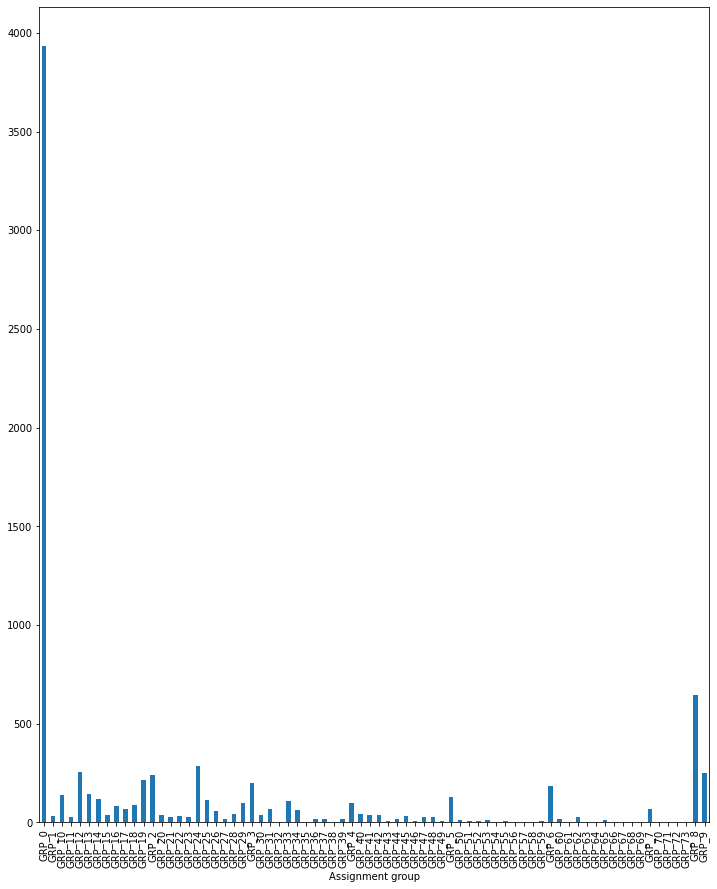

In [ ]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(12,15))
filtered.groupby('Assignment group').desc_analysis.count().plot.bar()
plt.show()

In [ ]:
# Vectorizing desc_analysis column
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(filtered['desc_analysis']).toarray()
labels = filtered['GroupID']
features.shape

(8417, 4521)

In [ ]:
# Finding most corelated bigram and unigram using Chi2 test  in desc_analysis column

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 4
for group, groupId in sorted(group_to_groupId.items()):
  features_chi2 = chi2(features, labels == groupId)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(group))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_0':
  . Most correlated unigrams:
       . job_
       . failed
       . job
       . job_scheduler
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_1':
  . Most correlated unigrams:
       . dev
       . oracle
       . sid_hotf
       . space
  . Most correlated bigrams:
       . space available
       . consumed space
       . space consumed
       . volume dev


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_10':
  . Most correlated unigrams:
       . tax
       . balance
       . miro
       . hr_payroll_na_u
  . Most correlated bigrams:
       . cost center
       . travel expense
       . hr_payroll_na_u failed
       . job hr_payroll_na_u


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_11':
  . Most correlated unigrams:
       . occurs
       . task
       . drawing
       . npc
  . Most correlated bigrams:
       . error messages
       . engineering tool
       . erp inbox
       . content versions


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_12':
  . Most correlated unigrams:
       . server
       . disk
       . space
       . hostname_
  . Most correlated bigrams:
       . hostname_ average
       . disk space
       . free wh
       . average samples


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_13':
  . Most correlated unigrams:
       . inwarehouse_tools
       . billing
       . workflow
       . inwarehouse_tool
  . Most correlated bigrams:
       . create delivery
       . sales org
       . line item
       . unit price


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_14':
  . Most correlated unigrams:
       . plm
       . configair
       . alwaysupservice
       . exe
  . Most correlated bigrams:
       . hostname_ plm
       . node hostname_
       . alwaysupservice exe
       . exe service


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_15':
  . Most correlated unigrams:
       . ecc
       . sold
       . replicated
       . complaint
  . Most correlated bigrams:
       . account erp
       . customer account
       . created new
       . erp crm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_16':
  . Most correlated unigrams:
       . controller
       . mozilla
       . owner
       . collaboration_platform
  . Most correlated bigrams:
       . contact support
       . access collaboration_platform
       . company collaboration_platform
       . collaboration_platform page


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_17':
  . Most correlated unigrams:
       . forgot
       . passwords
       . everytg
       . prtgghjk
  . Most correlated bigrams:
       . erp password
       . set password
       . using password_management_tool
       . reset passwords


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_18':
  . Most correlated unigrams:
       . delivery
       . dn
       . kis
       . sping
  . Most correlated bigrams:
       . dn sto
       . help check
       . delivery note
       . delivery notes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_19':
  . Most correlated unigrams:
       . station
       . dock
       . latitude
       . laptop
  . Most correlated bigrams:
       . outlook client
       . mouse working
       . laptop model
       . id printer


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_2':
  . Most correlated unigrams:
       . kündigung
       . approved
       . termination
       . effective
  . Most correlated bigrams:
       . click link
       . approved click
       . sid_ sid_
       . effective approved


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_20':
  . Most correlated unigrams:
       . modify
       . sold
       . attributes
       . grade
  . Most correlated bigrams:
       . rqfng zkwfqagb
       . works fine
       . change erp
       . sales data


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_21':
  . Most correlated unigrams:
       . distributor_tool
       . clicked
       . quote
       . logo
  . Most correlated bigrams:
       . contact help
       . refer attachment
       . check fix
       . company center


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_22':
  . Most correlated unigrams:
       . crm
       . insufficient
       . forecast
       . plan
  . Most correlated bigrams:
       . outlook crm
       . list crm
       . crm dynamics
       . access crm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_23':
  . Most correlated unigrams:
       . training
       . module
       . course
       . ets
  . Most correlated bigrams:
       . ethics training
       . training course
       . login ets
       . ets training


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_24':
  . Most correlated unigrams:
       . setup
       . problems
       . ewew
       . ws
  . Most correlated bigrams:
       . jionmpsf wnkpzcmv
       . probleme mit
       . setup new
       . new ws


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_25':
  . Most correlated unigrams:
       . revenue
       . engineering_tools
       . sproc
       . eu_tool
  . Most correlated bigrams:
       . create new
       . engineering tool
       . eu_tool does
       . new customer


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_26':
  . Most correlated unigrams:
       . parties
       . meetings
       . quarantine
       . smtp
  . Most correlated bigrams:
       . message sent
       . send emails
       . left company
       . send email


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_27':
  . Most correlated unigrams:
       . older
       . reactivate
       . lunch
       . join
  . Most correlated bigrams:
       . lean tracker
       . ayrhcfxi zartupsw
       . join skype
       . outlook opening


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_28':
  . Most correlated unigrams:
       . fy
       . consultant
       . ext
       . ag
  . Most correlated bigrams:
       . help open
       . need assistance
       . install software
       . training room


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_29':
  . Most correlated unigrams:
       . mm
       . pr
       . po
       . purchasing
  . Most correlated bigrams:
       . run dn
       . net price
       . data employee
       . help fixing


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_3':
  . Most correlated unigrams:
       . monitor
       . rqxw
       . prtqx
       . clients
  . Most correlated bigrams:
       . new laptop
       . docking station
       . new employee
       . external monitor


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_30':
  . Most correlated unigrams:
       . resources
       . deal
       . human
       . xiaohe
  . Most correlated bigrams:
       . change log
       . connected internet
       . transfer xiaohe
       . human resources


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_31':
  . Most correlated unigrams:
       . opens
       . browser
       . prompts
       . prompting
  . Most correlated bigrams:
       . blue screen
       . vpn connected
       . provide details
       . details issue


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_32':
  . Most correlated unigrams:
       . ag
       . best
       . rejected
       . gentlemen
  . Most correlated bigrams:
       . soon possible
       . regards cd
       . best regards
       . technical support


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_33':
  . Most correlated unigrams:
       . pc
       . longer
       . terminal
       . defective
  . Most correlated bigrams:
       . longer works
       . network connection
       . printer mp
       . mace pc


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_34':
  . Most correlated unigrams:
       . read
       . folder
       . write
       . eagcldaten
  . Most correlated bigrams:
       . write access
       . access following
       . usa access
       . read write


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_35':
  . Most correlated unigrams:
       . cost
       . gone
       . forecast
       . centers
  . Most correlated bigrams:
       . job_ failed
       . job job_
       . failed job_scheduler
       . need access


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_36':
  . Most correlated unigrams:
       . uacyltoe
       . generating
       . hxgayczeing
       . ignore
  . Most correlated bigrams:
       . request change
       . unable create
       . uacyltoe hxgaycze
       . uacyltoe hxgayczeing


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_37':
  . Most correlated unigrams:
       . pbx
       . outbound
       . facilities
       . siemens
  . Most correlated bigrams:
       . phone number
       . usa pm
       . help desk
       . outbound calls


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_38':
  . Most correlated unigrams:
       . configuration
       . ec
       . delete
       . hpqc
  . Most correlated bigrams:
       . windows password
       . following error
       . uacyltoe hxgayczeing
       . receive following


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_39':
  . Most correlated unigrams:
       . srv
       . capacity
       . sys
       . ab
  . Most correlated bigrams:
       . label sys
       . ab space
       . sys hostname_
       . hostname_ ab


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_4':
  . Most correlated unigrams:
       . sw
       . router
       . mac
       . companysecure
  . Most correlated bigrams:
       . access point
       . interface gigabitethernet
       . mac address
       . point working


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_40':
  . Most correlated unigrams:
       . track
       . crm
       . opportstorage_product
       . opportunities
  . Most correlated bigrams:
       . email sent
       . attached screenshots
       . mobile app
       . ms crm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_41':
  . Most correlated unigrams:
       . operator
       . dashbankrd
       . improvement
       . mii
  . Most correlated bigrams:
       . internal server
       . erp mii
       . order operation
       . work center


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_42':
  . Most correlated unigrams:
       . makes
       . paper
       . measuring
       . eemw
  . Most correlated bigrams:
       . office germany
       . august th
       . measuring device
       . pc eemw


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_43':
  . Most correlated unigrams:
       . posting
       . centers
       . forgotten
       . shop_floor_app
  . Most correlated bigrams:
       . production orders
       . looks like
       . order number
       . support group


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_44':
  . Most correlated unigrams:
       . costs
       . cost
       . centers
       . profit
  . Most correlated bigrams:
       . error trying
       . cost center
       . attached error
       . warning message


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_45':
  . Most correlated unigrams:
       . mass
       . plant_
       . cpic
       . powder
  . Most correlated bigrams:
       . production_order_interface_vendor connc
       . connection production_order_interface_app
       . rfc connection
       . production order


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_46':
  . Most correlated unigrams:
       . hold
       . doubts
       . waiting
       . nx
  . Most correlated bigrams:
       . need help
       . does open
       . solve problem
       . error log


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_47':
  . Most correlated unigrams:
       . abended
       . consumed
       . volume
       . dev
  . Most correlated bigrams:
       . volume dev
       . hostname_ volume
       . number error
       . volume consumed


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_48':
  . Most correlated unigrams:
       . panel
       . pops
       . ppt
       . workshop
  . Most correlated bigrams:
       . asking password
       . receive emails
       . connected network
       . computer starts


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_49':
  . Most correlated unigrams:
       . doc
       . analytics
       . tracking
       . constantly
  . Most correlated bigrams:
       . changing password
       . did work
       . tried times
       . ask help


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_5':
  . Most correlated unigrams:
       . sid__uacyltoe
       . sid_hot
       . sid_hotf
       . sid_cold
  . Most correlated bigrams:
       . job sid_hotf
       . sid_hotf failed
       . sid_cold failed
       . job sid_cold


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_50':
  . Most correlated unigrams:
       . virus
       . tcwrdqboinition
       . fmxcnwpu
       . symantec
  . Most correlated bigrams:
       . singapore asa
       . attached document
       . company india
       . fmxcnwpu tcwrdqboinition


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_51':
  . Most correlated unigrams:
       . availability
       . min
       . ec
       . road
  . Most correlated bigrams:
       . monitoring_tool et
       . screenshot attached
       . reporting status
       . www company


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_52':
  . Most correlated unigrams:
       . accepted
       . salary
       . statement
       . zero
  . Most correlated bigrams:
       . location germany
       . universal worklist
       . travel expense
       . cost center


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_53':
  . Most correlated unigrams:
       . gr
       . cancelled
       . datacenter
       . hana
  . Most correlated bigrams:
       . access data
       . help resolve
       . id locked
       . hana sid_


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_54':
  . Most correlated unigrams:
       . rqfng
       . happen
       . responsible
       . stock
  . Most correlated bigrams:
       . job job_
       . failed job_scheduler
       . goods receipt
       . customer order


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_55':
  . Most correlated unigrams:
       . retrieve
       . bar
       . forms
       . finance_app
  . Most correlated bigrams:
       . try open
       . following error
       . receive following
       . run report


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_56':
  . Most correlated unigrams:
       . primary
       . stefyty
       . dns
       . datacenter
  . Most correlated bigrams:
       . relay lease
       . duration renew
       . sep dhcpd
       . correlation_data sep


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_57':
  . Most correlated unigrams:
       . able
       . access
       . report
       . global
  . Most correlated bigrams:
       . failed job_scheduler
       . job job_
       . job_ failed
       . able access


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_58':
  . Most correlated unigrams:
       . restart
       . dba
       . stopped
       . engg
  . Most correlated bigrams:
       . job_ failed
       . job job_
       . failed job_scheduler
       . soon possible


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_59':
  . Most correlated unigrams:
       . step
       . workers
       . eu_tool
       . delay
  . Most correlated bigrams:
       . did determine
       . notice slow
       . workers notice
       . determine network


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_6':
  . Most correlated unigrams:
       . job_scheduler
       . job_b
       . job_d
       . snp_heu__regen
  . Most correlated bigrams:
       . job_d failed
       . job job_d
       . snp_heu__regen failed
       . job snp_heu__regen


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_60':
  . Most correlated unigrams:
       . notg
       . processes
       . monitoring_tool
       . hostname_fail
  . Most correlated bigrams:
       . alert monitoring_tool
       . job hostname_fail
       . hostname_fail failed
       . hxgaycze failed


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_61':
  . Most correlated unigrams:
       . company
       . com
       . aerp
       . responding
  . Most correlated bigrams:
       . job job_
       . failed job_scheduler
       . company com
       . company company


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_62':
  . Most correlated unigrams:
       . keybankrd
       . deliver
       . statements
       . period
  . Most correlated bigrams:
       . new version
       . print screen
       . working company
       . september th


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_63':
  . Most correlated unigrams:
       . calls
       . receipt
       . samsung
       . android
  . Most correlated bigrams:
       . failed job_scheduler
       . crm app
       . mobile phone
       . dynamics crm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_64':
  . Most correlated unigrams:
       . waiting
       . wait
       . confirmation
       . cancel
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_65':
  . Most correlated unigrams:
       . kb
       . ftp
       . deeghyupak
       . ebhsm
  . Most correlated bigrams:
       . received email
       . label dat
       . screenshot attached
       . login company


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_66':
  . Most correlated unigrams:
       . seconds
       . double
       . lauacyltoe
       . installing
  . Most correlated bigrams:
       . failed job_scheduler
       . ms office
       . lauacyltoe hxgaycze
       . office installation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_67':
  . Most correlated unigrams:
       . complete
       . vacation
       . regional
       . forecast
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_68':
  . Most correlated unigrams:
       . rd
       . personnel
       . submit
       . expense
  . Most correlated bigrams:
       . following error
       . does exist
       . trying create
       . expense report


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_69':
  . Most correlated unigrams:
       . xedbf
       . foreseeexternalip
       . srcassetofinterest
       . jul
  . Most correlated bigrams:
       . inspectoreventid eventtypepriority
       . outbound connection
       . connection tcp
       . repeat outbound


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_7':
  . Most correlated unigrams:
       . desktop
       . routing
       . interaction
       . telephony_software
  . Most correlated bigrams:
       . new computer
       . reset password
       . phone phone
       . interaction desktop


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_70':
  . Most correlated unigrams:
       . training
       . standard
       . ts
       . signature
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_71':
  . Most correlated unigrams:
       . transferred
       . concerned
       . schedule
       . pi
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_72':
  . Most correlated unigrams:
       . account
       . update
       . locked
       . ticket_no
  . Most correlated bigrams:
       . job job_
       . failed job_scheduler
       . account locked
       . ticket ticket_no


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_73':
  . Most correlated unigrams:
       . directly
       . cache
       . taken
       . sso
  . Most correlated bigrams:
       . job job_
       . failed job_scheduler
       . unable log
       . portal hub


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_8':
  . Most correlated unigrams:
       . job_
       . failed
       . job
       . job_scheduler
  . Most correlated bigrams:
       . backup circuit
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_9':
  . Most correlated unigrams:
       . failed
       . job
       . job_scheduler
       . job_
  . Most correlated bigrams:
       . job_ time
       . failed job_scheduler
       . job_ failed
       . job job_


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
##  From above correlation analysis below group can be merged 
##  GRP_0,GRP_35,GRP_54,GRP_58,GRP_61,GRP_64,GRP_67,GRP_70,GRP_71  can be clubbed together.
##  GRP_1,GRP_12,GRP_47,GRP_39  are related group
##  GRP_10,GRP_68  are related group
##  GRP_13,GRP_29  are related group

## Correlation Analysis on short description

In [ ]:
# Vectorizing desc_analysis column
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(filtered['short_desc_analysis']).toarray()
labels = filtered['GroupID']
features.shape

(8417, 1657)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 4
for group, groupId in sorted(group_to_groupId.items()):
  features_chi2 = chi2(features, labels == groupId)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(group))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_0':
  . Most correlated unigrams:
       . job_
       . failed
       . job
       . job_scheduler
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_1':
  . Most correlated unigrams:
       . sid_hotf
       . space
       . dev
       . oracle
  . Most correlated bigrams:
       . job sid_hotf
       . vmsliazh ltksxmyv
       . space consumed
       . volume dev
# 'GRP_10':
  . Most correlated unigrams:
       . posting
       . accounting
       . payment
       . hr_payroll_na_u
  . Most correlated bigrams:
       . failed job_scheduler
       . tax code
       . hr_payroll_na_u failed
       . job hr_payroll_na_u


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_11':
  . Most correlated unigrams:
       . engineering
       . enterprise
       . drawing
       . npc
  . Most correlated bigrams:
       . erp gui
       . business_client issue
       . erp business
       . engineering tool
# 'GRP_12':
  . Most correlated unigrams:
       . server
       . space
       . disk
       . hostname_
  . Most correlated bigrams:
       . free wh
       . disk free
       . disk space
       . server hostname_
# 'GRP_13':
  . Most correlated unigrams:
       . workflow
       . order
       . inwarehouse_tools
       . inwarehouse_tool
  . Most correlated bigrams:
       . work normally
       . time network
       . sales order
       . open order


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_14':
  . Most correlated unigrams:
       . plm
       . alwaysupservice
       . configair
       . exe
  . Most correlated bigrams:
       . plm conversion
       . alwaysupservice exe
       . configair server
       . exe service
# 'GRP_15':
  . Most correlated unigrams:
       . master
       . visible
       . complaint
       . crm
  . Most correlated bigrams:
       . error message
       . msd crm
       . new customer
       . erp crm
# 'GRP_16':
  . Most correlated unigrams:
       . denied
       . hub
       . finance
       . collaboration_platform
  . Most correlated bigrams:
       . need access
       . access denied
       . collaboration_platform access
       . collaboration_platform site


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_17':
  . Most correlated unigrams:
       . reset
       . password_management_tool
       . using
       . passwords
  . Most correlated bigrams:
       . password reset
       . password_management_tool password
       . using password_management_tool
       . reset passwords
# 'GRP_18':
  . Most correlated unigrams:
       . sping
       . kis
       . little
       . dn
  . Most correlated bigrams:
       . delivery note
       . delivery notes
       . little help
       . need little


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_19':
  . Most correlated unigrams:
       . os
       . battery
       . station
       . laptop
  . Most correlated bigrams:
       . analysis office
       . docking station
       . printer working
       . outlook client
# 'GRP_2':
  . Most correlated unigrams:
       . terminate
       . action
       . completed
       . termination
  . Most correlated bigrams:
       . effective approved
       . terminate action
       . access issue
       . erp access
# 'GRP_20':
  . Most correlated unigrams:
       . creation
       . assign
       . pull
       . month
  . Most correlated bigrams:
       . production order
       . error trying
       . work center
       . tax code


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_21':
  . Most correlated unigrams:
       . engine
       . center
       . quote
       . distributor_tool
  . Most correlated bigrams:
       . failed job_scheduler
       . pm est
       . open order
       . company center
# 'GRP_22':
  . Most correlated unigrams:
       . msd
       . vitalyst
       . forecast
       . crm
  . Most correlated bigrams:
       . access denied
       . crm dynamics
       . crm issue
       . msd crm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_23':
  . Most correlated unigrams:
       . current
       . training
       . course
       . ets
  . Most correlated bigrams:
       . able login
       . access ets
       . ets training
       . login ets
# 'GRP_24':
  . Most correlated unigrams:
       . setup
       . ewew
       . problems
       . ws
  . Most correlated bigrams:
       . jionmpsf wnkpzcmv
       . probleme mit
       . setup new
       . new ws
# 'GRP_25':
  . Most correlated unigrams:
       . confirmations
       . engineering_tool
       . revenue
       . eu_tool
  . Most correlated bigrams:
       . engineering tool
       . new customer
       . eu_tool does
       . eu_tool working


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_26':
  . Most correlated unigrams:
       . delegation
       . email
       . sending
       . meetings
  . Most correlated bigrams:
       . unable send
       . skype meetings
       . email address
       . email delegation
# 'GRP_27':
  . Most correlated unigrams:
       . reactivate
       . sfb
       . crasg
       . spam
  . Most correlated bigrams:
       . single sign
       . login pc
       . outlook opening
       . sign portal
# 'GRP_28':
  . Most correlated unigrams:
       . mode
       . tel
       . ag
       . fy
  . Most correlated bigrams:
       . user login
       . new iphone
       . germany location
       . training room


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_29':
  . Most correlated unigrams:
       . requisition
       . po
       . pr
       . purchasing
  . Most correlated bigrams:
       . create delivery
       . erp issue
       . unable create
       . goods receipt
# 'GRP_3':
  . Most correlated unigrams:
       . xerox
       . monitor
       . clients
       . prtqx
  . Most correlated bigrams:
       . new laptop
       . external monitor
       . printer issue
       . monitor display
# 'GRP_30':
  . Most correlated unigrams:
       . transfer
       . turn
       . xiaohe
       . zhengping
  . Most correlated bigrams:
       . connection tcp
       . error logging
       . ip address
       . transfer xiaohe


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_31':
  . Most correlated unigrams:
       . browser
       . blue
       . started
       . prompting
  . Most correlated bigrams:
       . access network
       . vpn connected
       . blue screen
       . tablet dell
# 'GRP_32':
  . Most correlated unigrams:
       . aw
       . rejected
       . po
       . ag
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_33':
  . Most correlated unigrams:
       . defekt
       . pc
       . wk
       . defective
  . Most correlated bigrams:
       . network connection
       . does work
       . does start
       . printer does


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_34':
  . Most correlated unigrams:
       . access
       . license
       . write
       . folder
  . Most correlated bigrams:
       . read write
       . vpn access
       . access vpn
       . folder access
# 'GRP_35':
  . Most correlated unigrams:
       . job
       . erp
       . access
       . need
  . Most correlated bigrams:
       . job job_
       . failed job_scheduler
       . need access
       . access erp
# 'GRP_36':
  . Most correlated unigrams:
       . uacyltoe
       . generating
       . ticketing_tool
       . hxgayczeing
  . Most correlated bigrams:
       . usa usa
       . unable submit
       . uacyltoe hxgaycze
       . uacyltoe hxgayczeing


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_37':
  . Most correlated unigrams:
       . telephone
       . calls
       . light
       . pbx
  . Most correlated bigrams:
       . located usa
       . desk phone
       . phone number
       . usa pm
# 'GRP_38':
  . Most correlated unigrams:
       . longer
       . admin
       . hpqc
       . delete
  . Most correlated bigrams:
       . job_ failed
       . job job_
       . failed job_scheduler
       . error message
# 'GRP_39':
  . Most correlated unigrams:
       . space
       . hostname_
       . sys
       . ab
  . Most correlated bigrams:
       . label sys
       . ab space
       . sys hostname_
       . hostname_ ab


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_4':
  . Most correlated unigrams:
       . gigabitethernet
       . usa
       . point
       . cisco
  . Most correlated bigrams:
       . ap chn
       . access sw
       . interface gigabitethernet
       . access point
# 'GRP_40':
  . Most correlated unigrams:
       . msd
       . dynamics
       . crm
       . opportunities
  . Most correlated bigrams:
       . ms crm
       . msd crm
       . crm dynamics
       . dynamics crm
# 'GRP_41':
  . Most correlated unigrams:
       . dashbankrd
       . qty
       . performance
       . mii
  . Most correlated bigrams:
       . server error
       . order number
       . internal server
       . work center


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_42':
  . Most correlated unigrams:
       . barcode
       . printer
       . defective
       . eemw
  . Most correlated bigrams:
       . longer works
       . pdf files
       . measuring device
       . pc eemw
# 'GRP_43':
  . Most correlated unigrams:
       . problems
       . number
       . misplaced
       . shop_floor_app
  . Most correlated bigrams:
       . failed job_scheduler
       . need access
       . production order
       . order number
# 'GRP_44':
  . Most correlated unigrams:
       . plant_
       . cost
       . different
       . pgi
  . Most correlated bigrams:
       . erp sid_
       . password reset
       . expense report
       . usa plant


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_45':
  . Most correlated unigrams:
       . creating
       . printed
       . release
       . route
  . Most correlated bigrams:
       . production_order_interface_vendor connc
       . snipping tool
       . does print
       . production order
# 'GRP_46':
  . Most correlated unigrams:
       . engineering
       . programdnty
       . loaded
       . nx
  . Most correlated bigrams:
       . failed job_scheduler
       . engineering tool
       . does open
       . tool erp
# 'GRP_47':
  . Most correlated unigrams:
       . core
       . abended
       . volume
       . dev
  . Most correlated bigrams:
       . abended job
       . volume dev
       . hostname_ hostname_
       . volume consumed


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_48':
  . Most correlated unigrams:
       . boot
       . errors
       . malfunction
       . failure
  . Most correlated bigrams:
       . failed job_scheduler
       . account locked
       . security incidents
       . incidents possible
# 'GRP_49':
  . Most correlated unigrams:
       . vmsliazh
       . ltksxmyv
       . broken
       . crashes
  . Most correlated bigrams:
       . job job_
       . failed job_scheduler
       . password change
       . vmsliazh ltksxmyv
# 'GRP_5':
  . Most correlated unigrams:
       . sid_hot
       . sid__uacyltoe
       . sid_hotf
       . sid_cold
  . Most correlated bigrams:
       . sid_hotf failed
       . job sid_hotf
       . job sid_cold
       . sid_cold failed


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_50':
  . Most correlated unigrams:
       . updated
       . detected
       . symantec
       . virus
  . Most correlated bigrams:
       . connection tcp
       . outbound connection
       . lauacyltoe hxgaycze
       . vpn working
# 'GRP_51':
  . Most correlated unigrams:
       . credit
       . prod
       . component
       . product
  . Most correlated bigrams:
       . job_ failed
       . job job_
       . failed job_scheduler
       . company com
# 'GRP_52':
  . Most correlated unigrams:
       . master
       . missing
       . cost
       . schedule
  . Most correlated bigrams:
       . job job_
       . failed job_scheduler
       . batch job
       . travel expense


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_53':
  . Most correlated unigrams:
       . systems
       . sql
       . admin
       . hana
  . Most correlated bigrams:
       . comments added
       . sid_ user
       . company internal
       . sid_ sid_
# 'GRP_54':
  . Most correlated unigrams:
       . warehouse
       . product
       . question
       . taking
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_55':
  . Most correlated unigrams:
       . oracle
       . financial
       . resolve
       . finance_app
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_56':
  . Most correlated unigrams:
       . android
       . primary
       . ip
       . provide
  . Most correlated bigrams:
       . netbios activity
       . rpc ms
       . ms ds
       . incidents suspicious
# 'GRP_57':
  . Most correlated unigrams:
       . need
       . able
       . report
       . global
  . Most correlated bigrams:
       . failed job_scheduler
       . job job_
       . job_ failed
       . able access
# 'GRP_58':
  . Most correlated unigrams:
       . database
       . restart
       . engg
       . stopped
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_59':
  . Most correlated unigrams:
       . tmqfjard
       . qzhgdoua
       . clock
       . confirmations
  . Most correlated bigrams:
       . network problems
       . problems multiple
       . multiple applications
       . applications running
# 'GRP_6':
  . Most correlated unigrams:
       . delivery
       . j

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_60':
  . Most correlated unigrams:
       . lacw
       . notg
       . monitoring_tool
       . hostname_fail
  . Most correlated bigrams:
       . failed job_scheduler
       . hostname_fail failed
       . job hostname_fail
       . hxgaycze failed
# 'GRP_61':
  . Most correlated unigrams:
       . company
       . com
       . responding
       . aerp
  . Most correlated bigrams:
       . job job_
       . failed job_scheduler
       . company com
       . company company
# 'GRP_62':
  . Most correlated unigrams:
       . review
       . sao
       . bank
       . format
  . Most correlated bigrams:
       . traffic sinkhole
       . sinkhole domain
       . incidents dsw
       . incidents sw


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_63':
  . Most correlated unigrams:
       . app
       . iphone
       . calls
       . make
  . Most correlated bigrams:
       . failed job_scheduler
       . unable install
       . crm app
       . mobile phone
# 'GRP_64':
  . Most correlated unigrams:
       . email
       . change
       . ticket_no
       . report
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_65':
  . Most correlated unigrams:
       . dat
       . encryption
       . ebhsm
       . deployment
  . Most correlated bigrams:
       . label dat
       . login company
       . deployment notification
       . notification telephony_software


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_66':
  . Most correlated unigrams:
       . version
       . tess
       . lauacyltoe
       . installing
  . Most correlated bigrams:
       . job_ failed
       . job job_
       . failed job_scheduler
       . lauacyltoe hxgaycze
# 'GRP_67':
  . Most correlated unigrams:
       . job
       . unable
       . complete
       . forecast
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_68':
  . Most correlated unigrams:
       . working
       . submit
       . report
       . expense
  . Most correlated bigrams:
       . job_ failed
       . job job_
       . failed job_scheduler
       . expense report


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_69':
  . Most correlated unigrams:
       . connection
       . outbound
       . repeat
       . tcp
  . Most correlated bigrams:
       . security incidents
       . repeat outbound
       . connection tcp
       . outbound connection
# 'GRP_7':
  . Most correlated unigrams:
       . calls
       . routing
       . interaction
       . telephony_software
  . Most correlated bigrams:
       . reset password
       . telephony_software phone
       . interaction desktop
       . telephony_software password
# 'GRP_70':
  . Most correlated unigrams:
       . job
       . link
       . mail
       . says
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_71':
  . Most correlated unigrams:
       . know
       . files
       . let
       . schedule
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_72':
  . Most correlated unigrams:
       . locked
       . update
       . ticket
       . ticket_no
  . Most correlated bigrams:
       . job_ failed
       . job job_
       . failed job_scheduler
       . account locked
# 'GRP_73':
  . Most correlated unigrams:
       . failed
       . job_scheduler
       . job
       . working
  . Most correlated bigrams:
       . password reset
       . job_ failed
       . job job_
       . failed job_scheduler


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'GRP_8':
  . Most correlated unigrams:
       . job_
       . failed
       . job
       . job_scheduler
  . Most correlated bigrams:
       . network outage
       . job_ failed
       . job job_
       . failed job_scheduler
# 'GRP_9':
  . Most correlated unigrams:
       . failed
       . job
       . job_scheduler
       . job_
  . Most correlated bigrams:
       . job_scheduler job_
       . failed job_scheduler
       . job_ failed
       . job job_


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
## Based on above short desc analysis below assignment group can be grouped together.
# GRP_17,GRP_32,GRP_38,GRP_46,GRP_49,GRP_51,GRP_52,GRP_53,GRP_54,GRP_55,GRP_58,GRP_63,GRP_66,GRP_73


Based on desc_analysis and short_desc_analysis final assignment group that can be merged
- GRP_0,GRP_35,GRP_54,GRP_58,GRP_61,GRP_64,GRP_67,GRP_70,GRP_71,GRP_17,GRP_32,GRP_38,GRP_46,GRP_49,GRP_51,GRP_52,GRP_53,GRP_54,GRP_55,GRP_58,GRP_63,GRP_66,GRP_73
- GRP_1,GRP_12,GRP_47,GRP_39
- GRP_10,GRP_68
- GRP_13,GRP_29




## Pairwise Simmilerity Analysis using BERT

In [ ]:
pip install sentence-transformers

     |████████████████████████████████| 78 kB 4.9 MB/s 
     |████████████████████████████████| 3.4 MB 21.9 MB/s 
     |████████████████████████████████| 3.3 MB 61.6 MB/s 
     |████████████████████████████████| 1.2 MB 37.0 MB/s 
     |████████████████████████████████| 61 kB 359 kB/s 
     |████████████████████████████████| 596 kB 35.3 MB/s 
     |████████████████████████████████| 895 kB 51.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=9f4676ae133e779b779bba1e8e960781427dc39ac7150f76e52a7559da87ffd2
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {filtered.iloc[doc_id]["short_desc_analysis"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {filtered.iloc[ix]["short_desc_analysis"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
            

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
bert_model=SentenceTransformer('bert-base-nli-mean-tokens')
doc_embedding=bert_model.encode(filtered['short_desc_analysis'].iloc[0:10])

pairwise_simmilerity=cosine_similarity(doc_embedding)
pairwise_diffrences=euclidean_distances(doc_embedding)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
most_similar(2,pairwise_simmilerity,'Cosine Similarity')
most_similar(2,pairwise_diffrences,'Euclidean Distance')

Document: cannot log in to vpn


Similar Documents:


Document: unable to access hr_tool page
Cosine Similarity : 0.8760676383972168


Document: unable to log in to engineering tool and skype
Cosine Similarity : 0.849195122718811


Document: unable to disable add ins on outlook
Cosine Similarity : 0.8373228311538696


Document: ticket_no- employment status - new non-employee [enter user's name]
Cosine Similarity : 0.5997437834739685


Document: skype error
Cosine Similarity : 0.5476329922676086


Document: login issue
Cosine Similarity : 0.5012898445129395


Document: ticket update on inplant_
Cosine Similarity : 0.3279164433479309


Document: event: critical:hostname_.company.com the value of mountpoint threshold for /oracle/sid_/erpdata/
Cosine Similarity : 0.3068852126598358


Document: outlook
Cosine Similarity : 0.26410287618637085
Document: cannot log in to vpn


Similar Documents:


Document: unable to access hr_tool page
Euclidean Distance : 8.19194507598877


Document: unable 

Model Building:
- using short description to build model

In [ ]:
filtered.tail()

,short_desc_analysis,desc_analysis,Assignment group,GroupID
8495,emails not coming in from zz mail,i am not receiving the emails that i sent from zz mail. please advise,GRP_29,29
8496,telephony_software issue,telephony_software issue,GRP_0,0
8497,vip: windows password reset for tifpdchb pedxruyf,vip: windows password reset for tifpdchb pedxruyf,GRP_0,0
8498,mace is not working,i am unable to access the mace utilities to finish the drawers adjustment settings. is no network..,GRP_62,62
8499,Different programs cannot be opened on several pc's.,Different programs cannot be opened on several pc's. area cnc.,GRP_49,48


In [ ]:
ShortDesc_df=filtered[['short_desc_analysis','Assignment group','GroupID']]

In [ ]:
ShortDesc_df.to_excel('shortdesc.xls')

In [2]:
import pandas as pd
ShortDesc_df=pd.read_excel('/content/sample_data/shortdesc.xls')

In [3]:
ShortDesc_df.shape

(6590, 4)

In [4]:
# checking duplicates
ShortDesc_df.duplicated().value_counts()

False    6590
dtype: int64

In [5]:
# removing duplicates
ShortDesc_df=ShortDesc_df.drop_duplicates()

In [6]:
# setting threshold
ShortDesc_df.iloc[(ShortDesc_df.GroupID.value_counts()>5).index]

,Unnamed: 0,short_desc_analysis,Assignment group,GroupID
0,0,login issue,GRP_0,0
7,7,ticket_no- employment status - new non-employe...,GRP_0,0
24,25,erp sid_ password reset,GRP_0,0
11,11,hr_tool site not loading page correctly,GRP_0,0
19,20,unable to check payslips,GRP_0,0
...,...,...,...,...
64,67,job job_ failed in job_scheduler,GRP_9,8
67,73,user needs help to connect to the wireless con...,GRP_0,0
73,83,job bwhrattr failed in job_scheduler,GRP_9,8
34,35,ticket_no-employment status - new non-employee,GRP_0,0


In [7]:
# setting threshold for at least 5 records in a group
ShortDesc_Ticket=ShortDesc_df.groupby('Assignment group').filter(lambda x: len(x) >5)

In [8]:
len(ShortDesc_Ticket['Assignment group'].value_counts())

55

In [9]:
ShortDesc_Ticket['short_desc_analysis']=ShortDesc_Ticket['short_desc_analysis'].str.replace('_','')

In [20]:
ShortDesc_Ticket.isnull().sum()

Unnamed: 0             0
short_desc_analysis    1
Assignment group       0
GroupID                0
dtype: int64

In [21]:
ShortDesc_Ticket=ShortDesc_Ticket.dropna()

In [22]:
# splitting into dependent varaiable and independent variable
X=ShortDesc_Ticket['short_desc_analysis']
y=ShortDesc_Ticket['GroupID']

In [33]:
tags=ShortDesc_Ticket['GroupID'].value_counts().index.tolist()

Statistical Modeling
-Naive base

In [34]:
from  sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=32, test_size=0.33, stratify=y )

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer


In [37]:
nb=Pipeline([('count',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB()) ])

In [38]:
nb.fit(X_train,Y_train)

Pipeline(steps=[('count', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [41]:
from sklearn.metrics import classification_report,accuracy_score

y_pred=nb.predict(X_test)
print('Accuracy :',accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

Accuracy : 0.5194444444444445
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      1958
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.92      0.68      0.78       142
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.16      0.57      0.25        23
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SGD Classifier Model

In [43]:
from sklearn.linear_model import SGDClassifier

sgd= Pipeline([('count',CountVectorizer()),('tfidf',TfidfTransformer()),
  ('',SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])

sgd.fit(X_train,Y_train)
y_pred=sgd.predict(X_test)

print('Accuracy :',accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

Accuracy : 0.5935185185185186
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      1554
           1       0.00      0.00      0.00         0
           2       0.15      0.50      0.24        20
           3       0.07      0.67      0.12         3
           4       0.00      0.00      0.00         4
           5       0.50      0.59      0.54        22
           6       0.14      0.38      0.20         8
           7       0.85      0.61      0.71       145
           8       0.04      0.33      0.07         3
           9       0.15      0.36      0.22        11
          10       0.10      0.50      0.17         2
          11       0.36      0.51      0.42        57
          12       0.38      0.51      0.44        35
          13       0.18      0.54      0.27        13
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       1.00      0.71      0.83        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression

lgr=Pipeline([('count',CountVectorizer()),('tfidf',TfidfTransformer()),
              ('lgr',LogisticRegression(n_jobs=1,C=1e5) )])

lgr.fit(X_train,Y_train)

y_pred=lgr.predict(X_test)

print('Accuracy :',accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

Accuracy : 0.5666666666666667
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      1188
           1       0.22      0.33      0.27         6
           2       0.25      0.26      0.25        62
           3       0.27      0.28      0.27        29
           4       0.12      0.18      0.14        11
           5       0.54      0.56      0.55        25
           6       0.45      0.50      0.48        20
           7       0.70      0.65      0.67       113
           8       0.15      0.18      0.17        22
           9       0.23      0.35      0.28        17
          10       0.10      0.33      0.15         3
          11       0.49      0.52      0.50        75
          12       0.47      0.45      0.46        49
          13       0.34      0.45      0.39        29
          14       0.42      0.62      0.50         8
          15       0.14      0.44      0.22         9
          16       1.00      1.00      1.00        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

# Random Forest Calssifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfr=Pipeline([('count',CountVectorizer()),('tfidf',TfidfTransformer()),
              ('lgr',RandomForestClassifier() )])

rfr.fit(X_train,Y_train)

y_pred=lgr.predict(X_test)

print('Accuracy :',accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

Accuracy : 0.5666666666666667
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      1188
           1       0.22      0.33      0.27         6
           2       0.25      0.26      0.25        62
           3       0.27      0.28      0.27        29
           4       0.12      0.18      0.14        11
           5       0.54      0.56      0.55        25
           6       0.45      0.50      0.48        20
           7       0.70      0.65      0.67       113
           8       0.15      0.18      0.17        22
           9       0.23      0.35      0.28        17
          10       0.10      0.33      0.15         3
          11       0.49      0.52      0.50        75
          12       0.47      0.45      0.46        49
          13       0.34      0.45      0.39        29
          14       0.42      0.62      0.50         8
          15       0.14      0.44      0.22         9
          16       1.00      1.00      1.00        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
